# Project: Investigating New Orleans 311 Data

## Student Name
Syeda Mah Noor Asad

## Webpage
https://syedamahnoorasad.github.io/Investigating-Nola-311-Data/

## Dataset Choice
I am using NOLA 311 Calls/Requests Dataset from 2012-2026. The dataset consist of records produced by the residents of New Orleans who submit their non-emergency problems to the city government. The data is available publicly at: https://data.nola.gov/City-Administration/311-OPCD-Calls-2012-Present-/2jgv-pqrq/data_preview. I downloaded the data in CSV format which I later import into a dataframe using pandas.

I am picking this dataset due to these reasons:
1. It relates to New Orleans so it hits close to home.
2. This data is massive and at the time of downloading had over 900,000 records. 
3. It is geenrally fairly organized but has issues with consistency, tidiness, and missing fields which make it a great candidate for pre-processing.
4. Within this data there are several different categories of issues reported. Such as entries pertaining to sewerage, parking, accessibility, electricity and so on. These sub-categories can be relevant and interesting. 
5. It is real, and open-government data that can lead to practical insights depicting real world trends. 
6. My own Phd research is based around civic and accessibility data and I think this is very in line and relevant to that. It will be helpful for me to investigate a data like this.

## Project Plan
I want to use this dataset to investigate the types, prevalence, and georgraphical nature of non-emergecny problems in New Orleans. The data has request type, relevant department, geographical information, opening and closing date. I also want to focus on accessibility aspects represented in the data and possibly paint a picture of accessibility in New Orleans. I can determine what request types categories can be classified into accessibility issues by manually labelling them. Some of the primary inquiries (not exhaustive list) I wish to dive into are:


### 1. Civic Responsiveness
1.1. What are some of the most prevalent accessibility issues that are presented in the city? 

1.2. How much time on average each requests takes to reach a resolution? What is the nature of the requests that are more likely to take longer to reach a resolution? 

### 2. Geographic Distribution
2.1. Are accessibility-related requests clustered in certain parts of the cities? Are these more prevalent in some districts? 

2.2. Does the resolution time change with the district? If yes, what could be the reason?

### 3. Data Modelling
3.1 Could we train a machine learning model on this data and create a model that predicts the resolution time for an unknown request? 




## Workflow

### Import data from the database

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [108]:
## Import data from the dataset csv file

nola_311 = pd.read_csv('311_OPCD_Calls_2012-Present.csv')

## Display the first few rows of the dataset to understand its structure
nola_311.head()

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Contractor,Contractor Action,RowID,X,Y,Longitude,Latitude,Location
0,2021-847416,Mayor's Request,Requests to the Mayor,12/10/2021 09:22:27 PM,07/08/2022 02:30:48 PM,07/08/2022 09:30:48 AM,Closed,Executive Office of the Mayor,NaN,NaN,Resolved,NaN,NaN,"847,416",NaN,NaN,0.000000,0.000000,"(0.0, 0.0)"
1,2022-858955,Tax and Revenue,Occupational License Tax,02/04/2022 03:39:45 PM,02/22/2022 07:09:55 AM,02/22/2022 01:09:55 AM,Closed,Bureau of Revenue,NaN,NaN,Resolved,NaN,NaN,"858,955",NaN,NaN,0.000000,0.000000,"(0.0, 0.0)"
2,2024-1145120,Traffic Safety,Request for Traffic Calming due to Speeding,10/30/2024 12:18:29 PM,12/22/2024 04:52:36 PM,NaN,Pending,Department of Public Works,1 Bamboo Rd,A,Pending,NaN,NaN,"1,145,120","3,663,515.88941","539,789.54625",-90.124582,29.978768,"(29.978768001649772, -90.12458247242685)"
3,2024-1145799,Trash/Recycling,Missed Trash Pick-Up,11/02/2024 07:58:56 AM,12/22/2024 04:51:17 PM,11/02/2024 04:09:40 AM,Closed,Department of Sanitation,2608 Magnolia St,B,Invalid Request,IV Waste,Invalid Request,"1,145,799","3,674,205.35803","526,080.457854",-90.091290,29.940758,"(29.940758205316882, -90.091290391251)"
4,2024-1145838,Roads and Streets,Push-up/Pavement Expansion,11/02/2024 03:10:10 PM,12/22/2024 04:48:43 PM,NaN,Pending,Department of Public Works,725 Voisin St,A,Pending,NaN,NaN,"1,145,838","3,668,424.02055","543,287.21947",-90.108963,29.988242,"(29.988242136809447, -90.10896265604138)"


### Tidying the data

In [109]:
### dropping redundant columns
nola_311.drop(columns=['Location'], inplace=True)
nola_311.head()

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Contractor,Contractor Action,RowID,X,Y,Longitude,Latitude
0,2021-847416,Mayor's Request,Requests to the Mayor,12/10/2021 09:22:27 PM,07/08/2022 02:30:48 PM,07/08/2022 09:30:48 AM,Closed,Executive Office of the Mayor,NaN,NaN,Resolved,NaN,NaN,"847,416",NaN,NaN,0.000000,0.000000
1,2022-858955,Tax and Revenue,Occupational License Tax,02/04/2022 03:39:45 PM,02/22/2022 07:09:55 AM,02/22/2022 01:09:55 AM,Closed,Bureau of Revenue,NaN,NaN,Resolved,NaN,NaN,"858,955",NaN,NaN,0.000000,0.000000
2,2024-1145120,Traffic Safety,Request for Traffic Calming due to Speeding,10/30/2024 12:18:29 PM,12/22/2024 04:52:36 PM,NaN,Pending,Department of Public Works,1 Bamboo Rd,A,Pending,NaN,NaN,"1,145,120","3,663,515.88941","539,789.54625",-90.124582,29.978768
3,2024-1145799,Trash/Recycling,Missed Trash Pick-Up,11/02/2024 07:58:56 AM,12/22/2024 04:51:17 PM,11/02/2024 04:09:40 AM,Closed,Department of Sanitation,2608 Magnolia St,B,Invalid Request,IV Waste,Invalid Request,"1,145,799","3,674,205.35803","526,080.457854",-90.091290,29.940758
4,2024-1145838,Roads and Streets,Push-up/Pavement Expansion,11/02/2024 03:10:10 PM,12/22/2024 04:48:43 PM,NaN,Pending,Department of Public Works,725 Voisin St,A,Pending,NaN,NaN,"1,145,838","3,668,424.02055","543,287.21947",-90.108963,29.988242


In [110]:
### Fixing column names 

### stripped leading and white space, converted to lowercase, replaced spaces with underscores
nola_311.columns = nola_311.columns.str.strip().str.lower().str.replace(' ', '_')

### rename column 
nola_311.rename(columns={'service_request_#': 'request_number'}, inplace=True)
nola_311.rename(columns={'rowid': 'row_id'}, inplace=True)
nola_311.rename(columns={'x': 'projected_x', 'y': 'projected_y'}, inplace=True)


nola_311.head()

,request_number,request_type,request_reason,date_created,date_modified,date_closed,request_status,responsible_agency,address,council_district,status,contractor,contractor_action,row_id,projected_x,projected_y,longitude,latitude
0,2021-847416,Mayor's Request,Requests to the Mayor,12/10/2021 09:22:27 PM,07/08/2022 02:30:48 PM,07/08/2022 09:30:48 AM,Closed,Executive Office of the Mayor,NaN,NaN,Resolved,NaN,NaN,"847,416",NaN,NaN,0.000000,0.000000
1,2022-858955,Tax and Revenue,Occupational License Tax,02/04/2022 03:39:45 PM,02/22/2022 07:09:55 AM,02/22/2022 01:09:55 AM,Closed,Bureau of Revenue,NaN,NaN,Resolved,NaN,NaN,"858,955",NaN,NaN,0.000000,0.000000
2,2024-1145120,Traffic Safety,Request for Traffic Calming due to Speeding,10/30/2024 12:18:29 PM,12/22/2024 04:52:36 PM,NaN,Pending,Department of Public Works,1 Bamboo Rd,A,Pending,NaN,NaN,"1,145,120","3,663,515.88941","539,789.54625",-90.124582,29.978768
3,2024-1145799,Trash/Recycling,Missed Trash Pick-Up,11/02/2024 07:58:56 AM,12/22/2024 04:51:17 PM,11/02/2024 04:09:40 AM,Closed,Department of Sanitation,2608 Magnolia St,B,Invalid Request,IV Waste,Invalid Request,"1,145,799","3,674,205.35803","526,080.457854",-90.091290,29.940758
4,2024-1145838,Roads and Streets,Push-up/Pavement Expansion,11/02/2024 03:10:10 PM,12/22/2024 04:48:43 PM,NaN,Pending,Department of Public Works,725 Voisin St,A,Pending,NaN,NaN,"1,145,838","3,668,424.02055","543,287.21947",-90.108963,29.988242


In [111]:
### check data types of each column
nola_311.dtypes

request_number         object
request_type           object
request_reason         object
date_created           object
date_modified          object
date_closed            object
request_status         object
responsible_agency     object
address                object
council_district       object
status                 object
contractor             object
contractor_action      object
row_id                 object
projected_x            object
projected_y            object
longitude             float64
latitude              float64
dtype: object

In [112]:
### convert columns to appropriate data types
nola_311['request_number'] = nola_311['request_number'].astype(str)
nola_311['row_id'] = nola_311['row_id'].str.replace(',', '').astype(int)
nola_311['projected_x'] = nola_311['projected_x'].str.replace(',', '').astype(float)
nola_311['projected_y'] = nola_311['projected_y'].str.replace(',', '').astype(float)
nola_311['date_modified'] = pd.to_datetime(nola_311['date_modified'])
nola_311['date_created'] = pd.to_datetime(nola_311['date_created'])
nola_311['date_closed'] = pd.to_datetime(nola_311['date_closed'])

nola_311.dtypes

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/786776180.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nola_311['date_modified'] = pd.to_datetime(nola_311['date_modified'])
/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/786776180.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nola_311['date_created'] = pd.to_datetime(nola_311['date_created'])


request_number                object
request_type                  object
request_reason                object
date_created          datetime64[ns]
date_modified         datetime64[ns]
date_closed           datetime64[ns]
request_status                object
responsible_agency            object
address                       object
council_district              object
status                        object
contractor                    object
contractor_action             object
row_id                         int64
projected_x                  float64
projected_y                  float64
longitude                    float64
latitude                     float64
dtype: object

In [115]:
### checking for missing values in the dataset
nola_311.isnull().sum()

### replace nan with 'Unknown' in the object type columns
object_columns = nola_311.select_dtypes(include=['object']).columns
nola_311[object_columns] = nola_311[object_columns].fillna('Unknown')

### replace projected_x and projected_y with 0 for missing values
nola_311['projected_x'] = nola_311['projected_x'].fillna(0)
nola_311['projected_y'] = nola_311['projected_y'].fillna(0)

In [116]:
nola_311.head()

,request_number,request_type,request_reason,date_created,date_modified,date_closed,request_status,responsible_agency,address,council_district,status,contractor,contractor_action,row_id,projected_x,projected_y,longitude,latitude
0,2021-847416,Mayor's Request,Requests to the Mayor,2021-12-10 21:22:27,2022-07-08 14:30:48,2022-07-08 09:30:48,Closed,Executive Office of the Mayor,Unknown,Unknown,Resolved,Unknown,Unknown,847416,0.000000e+00,0.000000,0.000000,0.000000
1,2022-858955,Tax and Revenue,Occupational License Tax,2022-02-04 15:39:45,2022-02-22 07:09:55,2022-02-22 01:09:55,Closed,Bureau of Revenue,Unknown,Unknown,Resolved,Unknown,Unknown,858955,0.000000e+00,0.000000,0.000000,0.000000
2,2024-1145120,Traffic Safety,Request for Traffic Calming due to Speeding,2024-10-30 12:18:29,2024-12-22 16:52:36,NaT,Pending,Department of Public Works,1 Bamboo Rd,A,Pending,Unknown,Unknown,1145120,3.663516e+06,539789.546250,-90.124582,29.978768
3,2024-1145799,Trash/Recycling,Missed Trash Pick-Up,2024-11-02 07:58:56,2024-12-22 16:51:17,2024-11-02 04:09:40,Closed,Department of Sanitation,2608 Magnolia St,B,Invalid Request,IV Waste,Invalid Request,1145799,3.674205e+06,526080.457854,-90.091290,29.940758
4,2024-1145838,Roads and Streets,Push-up/Pavement Expansion,2024-11-02 15:10:10,2024-12-22 16:48:43,NaT,Pending,Department of Public Works,725 Voisin St,A,Pending,Unknown,Unknown,1145838,3.668424e+06,543287.219470,-90.108963,29.988242


### Exploratory Data Analysis

##### Request Types and distribution

Important for Inquiry 1.1

In [132]:
### unqiue values in request_type column
request_types = nola_311['request_type'].unique()
print(f"Unique request types: {request_types}")

Unique request types: ["Mayor's Request" 'Tax and Revenue' 'Streetlights' 'Traffic Signals'
 'Safety & Permits' 'Trash/Recycling' 'Parks & Parkways'
 'General Services' 'Health Related Request' 'EMS' 'Abandoned Vehicles'
 'Roads/Drainage' 'Property Maintenance'
 'Traffic Signals/Signs/Striping/Streetlights' 'Health Related Questions'
 'Mosquito, Termite & Rodent Control' 'Law Enforcement Services'
 'Alley Ways' 'COVID-19' 'Taxi Issues' 'Drainage' 'Roads and Streets'
 'Road Striping' 'Street and Traffic Signs' 'Utility Poles'
 'Healthy Homes' 'City-Owned Cemeteries'
 'New Orleans Recreation Development Commission (NORDC)' 'Traffic Safety'
 'Graffiti Removal' 'Family Reunification'
 'Christmas Tree Recycle Pick Up' 'Unknown'
 'Hurricane Francine Tree-Related Issues or Emergencies\t'
 'Hard Rock Hotel Collapse']


In [133]:
### grouby request type and count number of requests for each type
request_type_counts = nola_311.groupby('request_type').size()

### sort the request type counts in descending order and display the top 10 request types
request_type_counts.sort_values(ascending=False).head(10)


request_type
Trash/Recycling         259294
Streetlights             29279
Abandoned Vehicles       28412
Property Maintenance     24572
Roads and Streets        16430
Drainage                 13458
Parks & Parkways         11303
Roads/Drainage            8325
Traffic Signals           5575
Safety & Permits          5479
dtype: int64

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/1988747233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_request_types.values, y=top_request_types.index, palette='viridis')


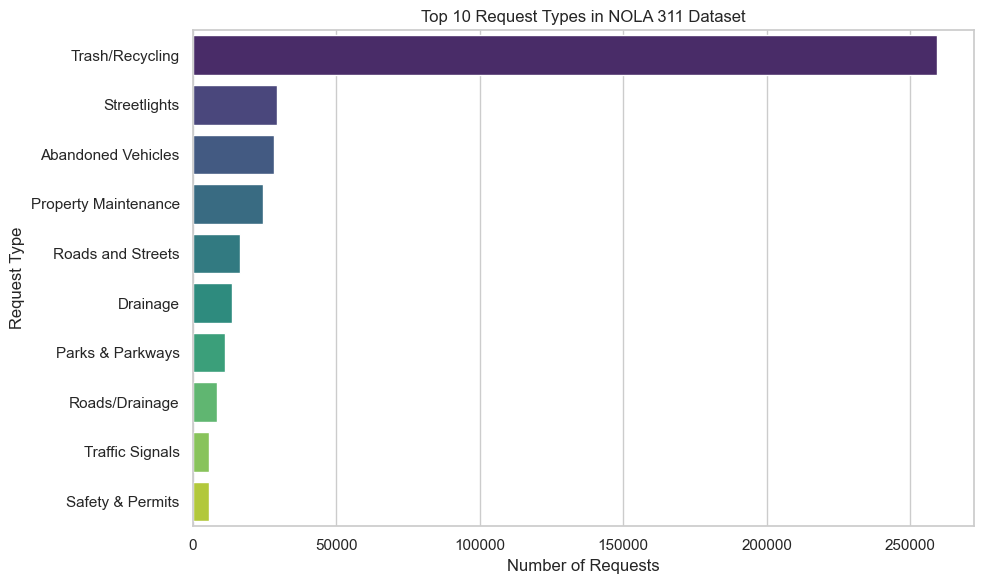

In [134]:
### bar plot of top 10 request types
top_request_types = request_type_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_request_types.values, y=top_request_types.index, palette='viridis')
plt.title('Top 10 Request Types in NOLA 311 Dataset')
plt.xlabel('Number of Requests')
plt.ylabel('Request Type')
plt.tight_layout()
plt.show()

##### Time distribution for requests

Important for inquiry 1.2 to find the average time distribution and potential discrepencies between types and gerographical reasons.

In [135]:
### groupby request type and calculate average time to close each request type in days
nola_311['time_to_close'] = (nola_311['date_closed'] - nola_311['date_created']).dt.total_seconds() / 3600 / 24
avg_time_to_close = nola_311.groupby('request_type')['time_to_close'].mean().sort_values(ascending=True).head(10)
print(avg_time_to_close)
  

request_type
Unknown                                                    12.891769
Hurricane Francine Tree-Related Issues or Emergencies\t    16.480049
Family Reunification                                       17.876007
Healthy Homes                                              24.865370
Utility Poles                                              29.246186
City-Owned Cemeteries                                      31.894843
Health Related Questions                                   43.264506
General Services                                           48.364652
Mayor's Request                                            68.834893
EMS                                                        72.459363
Name: time_to_close, dtype: float64


In [136]:
### check for cases where date_closed is before date_created
invalid_dates = nola_311[nola_311['date_closed'] < nola_311['date_created']]
print(f"Number of records with invalid dates: {len(invalid_dates)}")

### remove records with invalid dates
nola_311 = nola_311[nola_311['date_closed'] >= nola_311['date_created']]
print (f"Number of records after removing invalid dates: {len(nola_311)}")


Number of records with invalid dates: 0
Number of records after removing invalid dates: 425908


In [137]:
### average time to close a request by request type (in hours) in ascending order
print("Request types with lowest average time to close a request (in days):")
nola_311.groupby('request_type')['time_to_close'].mean().sort_values(ascending=True).head(10)


Request types with lowest average time to close a request (in days):


request_type
Unknown                                                    12.891769
Hurricane Francine Tree-Related Issues or Emergencies\t    16.480049
Family Reunification                                       17.876007
Healthy Homes                                              24.865370
Utility Poles                                              29.246186
City-Owned Cemeteries                                      31.894843
Health Related Questions                                   43.264506
General Services                                           48.364652
Mayor's Request                                            68.834893
EMS                                                        72.459363
Name: time_to_close, dtype: float64

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/2586559578.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_top10.values, y=avg_time_top10.index, palette='magma')


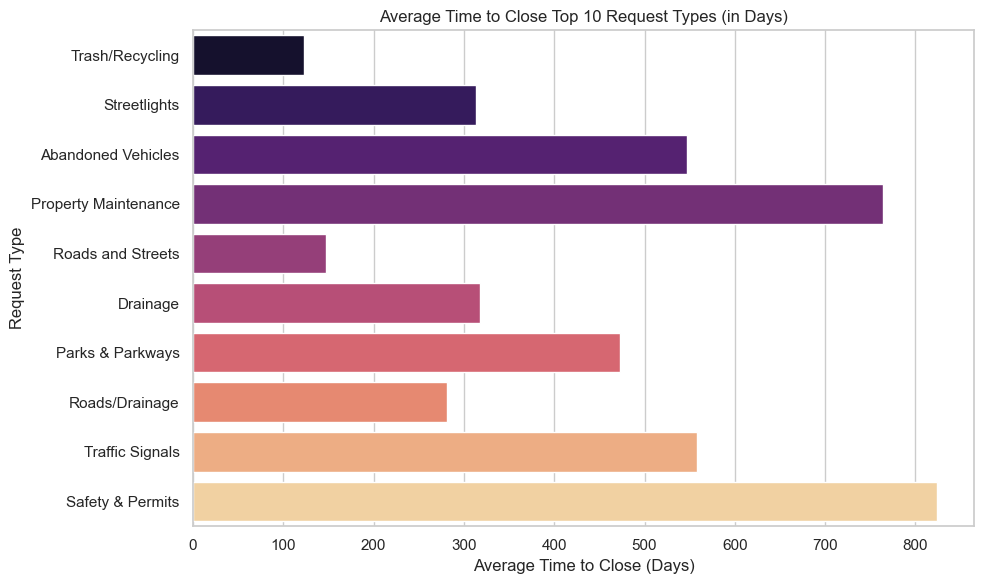

In [138]:
### new top 10 common requests with their average time to close in days
top10 = nola_311['request_type'].value_counts().head(10).index

avg_time_top10 = (
    nola_311[nola_311['request_type'].isin(top10)]
    .groupby('request_type')['time_to_close']
    .mean()
    .reindex(top10)
)

### plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_top10.values, y=avg_time_top10.index, palette='magma')
plt.title('Average Time to Close Top 10 Request Types (in Days)')
plt.xlabel('Average Time to Close (Days)')
plt.ylabel('Request Type')
plt.tight_layout()
plt.show()


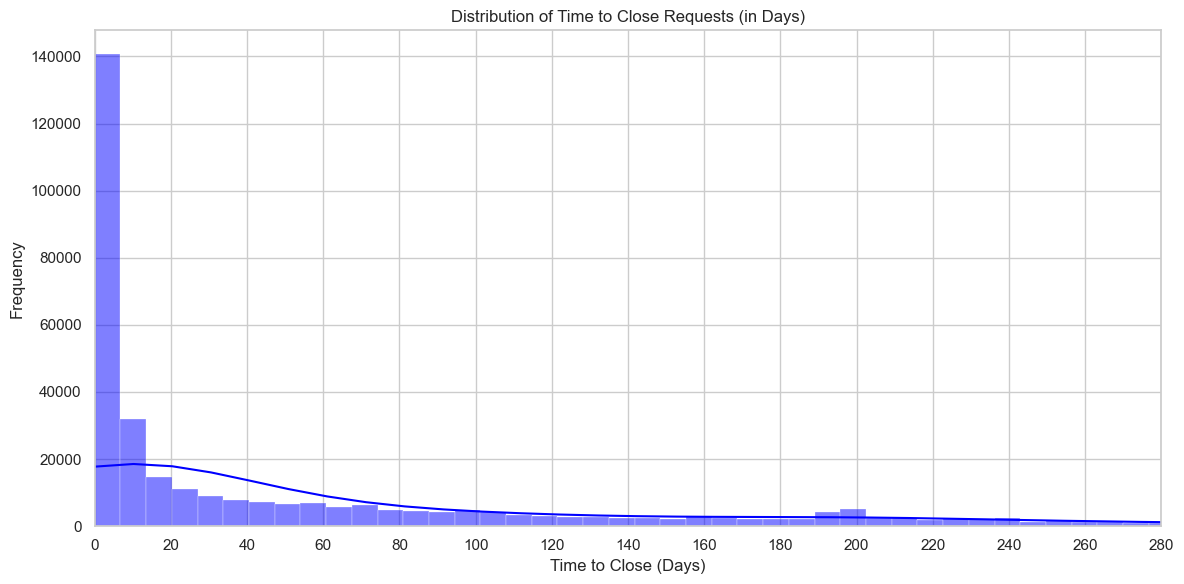

In [139]:
### distribution of time to close requests
plt.figure(figsize=(12, 6))
sns.histplot(nola_311['time_to_close'], bins=300, kde=True, color='blue')
plt.title('Distribution of Time to Close Requests (in Days)')
plt.xlabel('Time to Close (Days)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.xticks(range(0, 300, 20))
plt.tight_layout()
plt.show()

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/3629302438.py:9: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/Users/syedamahnoorasad/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


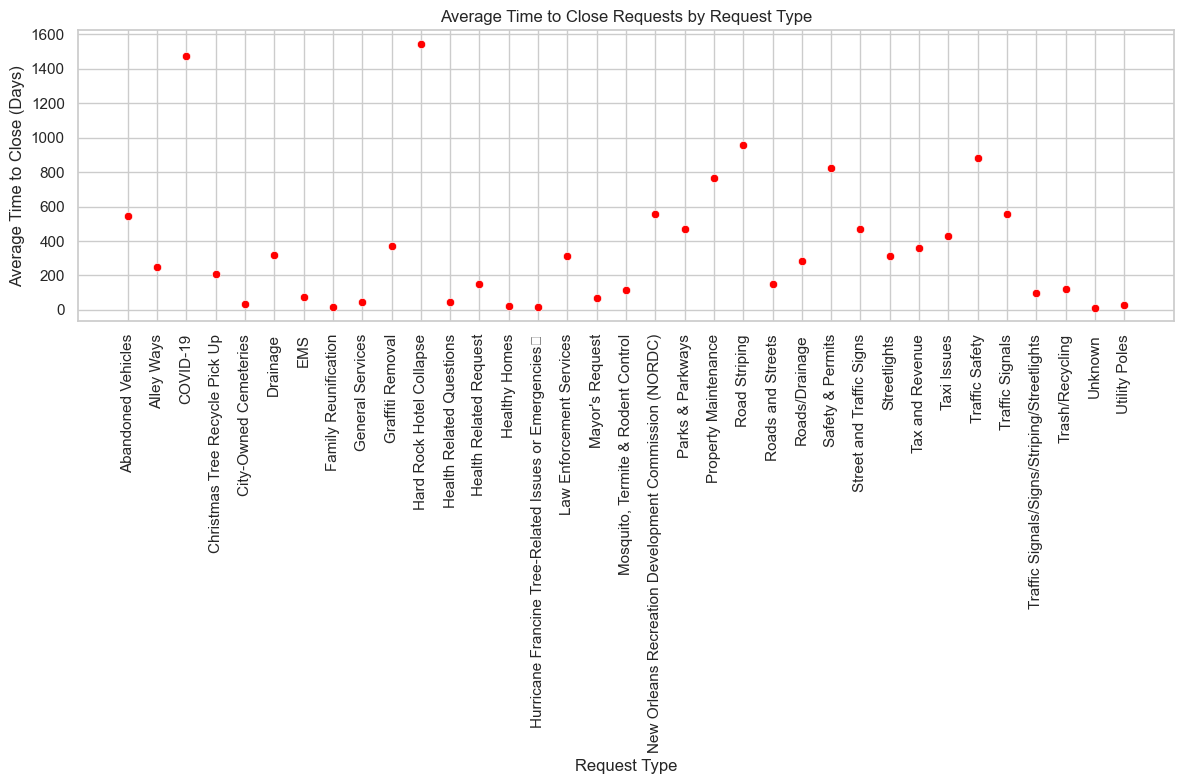

In [140]:
### scatter plot of average time to close requests by request type
avg_time_by_type = nola_311.groupby('request_type')['time_to_close'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=avg_time_by_type, x='request_type', y='time_to_close', color='red')
plt.xticks(rotation=90)
plt.title('Average Time to Close Requests by Request Type')
plt.xlabel('Request Type')
plt.ylabel('Average Time to Close (Days)')
plt.tight_layout()
plt.show()

This visualization helps us compare all the request types. We can see that Hard Rock hotel colapse and Covid-19 requets had the highest resolution times. 

##### Geographical distribution 

Important for inquiry 2.2

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/1460902740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_counts.values, y=district_counts.index, palette='coolwarm')


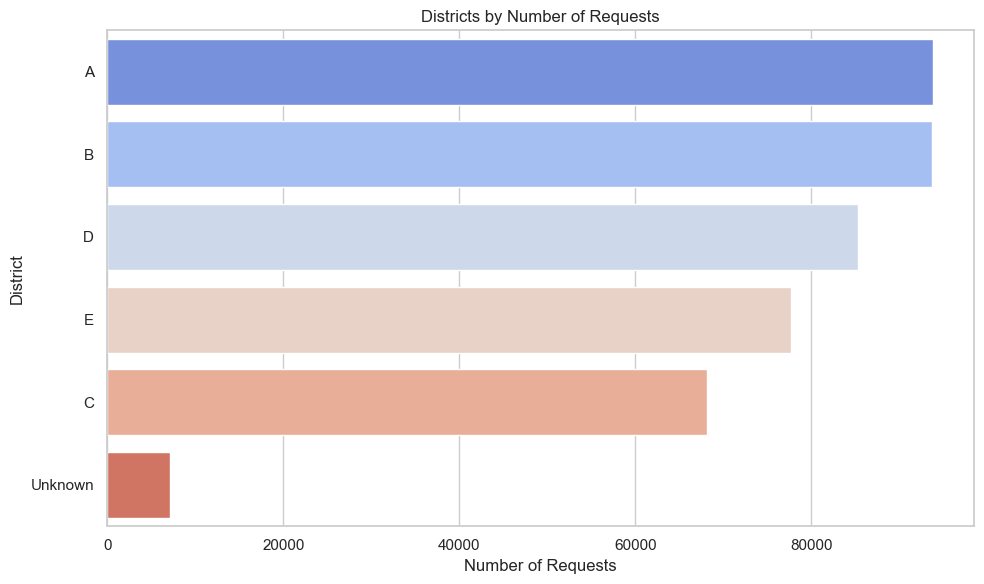

In [144]:
### districts with highest number of requests
district_counts = nola_311['council_district'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='coolwarm')
plt.title('Districts by Number of Requests')
plt.xlabel('Number of Requests')
plt.ylabel('District')
plt.tight_layout()
plt.show()

The number of requests per district is fairly even for top 3 districts. More investigation would need to go into determining whether the difference between these number of requests is significant or not.

/var/folders/r0/6m_3dcrs53qf0lfygy7ffmwm0000gn/T/ipykernel_71340/2122413471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_by_district['time_to_close'], y=avg_time_by_district['council_district'], palette='viridis')


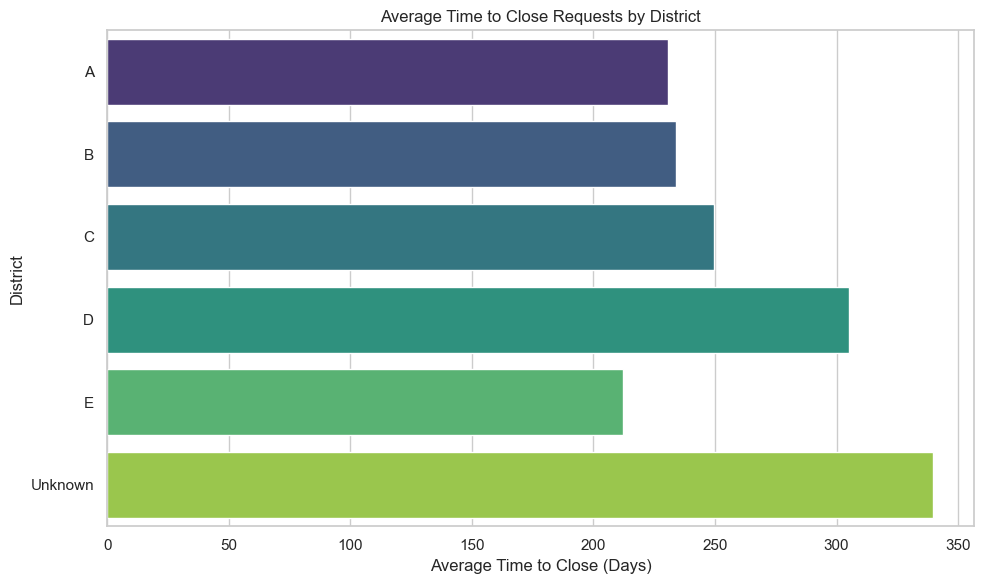

In [143]:
### Average resolution time by district
avg_time_by_district = nola_311.groupby('council_district')['time_to_close'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_by_district['time_to_close'], y=avg_time_by_district['council_district'], palette='viridis')
plt.title('Average Time to Close Requests by District')
plt.xlabel('Average Time to Close (Days)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

I think it is interesting that District D has significantly higher average resolution time. This would require more investigation later. 